###Creating Data with Generative AI - Text Summarization using NLP

In this notebook, we will discuss about Generative AI in context of data. How large language models are significiant in field of advanced natural language processing, enabling high-quality text generation, improving customer service, aiding in data analysis.

###**Introduction to generative AI and its applications.**

Deep learning is the subset of machine learning methods. It uses Artificial neural networks- allowing them to process more complex patterns than traditional machine learning.

**Deep learning model types:**

* Discriminative
* Generative

We will focus of Generative model type.

These models generates new data that is similar to data it was trained on
understands distribution of data and how likely a given example is
predict next word in sequence

Generative AI refers to a subset of artificial intelligence that focuses on creating new content, whether it be text, images, sound, or other data types. It stands in contrast to discriminative AI, which is typically used for classifying or making predictions based on existing data. The 'generative' aspect comes from these AI models' ability to generate outputs that can be entirely new and unseen during their training.

Major Types of Generative AI Models:

* Generative Adversarial Networks (GANs)

* Variational Autoencoders (VAEs)

* Transformer-Based Models


####**Applications of Generative AI:**

* Content Creation: Art and Design , Music Composition

* Text Generation: Creative Writing, Chatbots and Conversational Agents

* Image and Video Generation: Photorealistic Images, Deep fakes

* Data Augmentation: Enhancing datasets in machine learning, particularly useful when training data is scarce.

* Drug Discovery and Material Science


####To demonstrate the use of NLP in summarization task, I have decided to use TextRank algorithm.


###Understanding "TextRank Algorithm":

Before getting started with the TextRank algorithm, there’s another algorithm which we should become familiar with – the ***PageRank algorithm***. In fact, this actually inspired TextRank! PageRank is used primarily for ranking web pages in online search results.

* PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

Here’s the original formula for calculating PageRank (PR) of page A, where d is a “damping factor” between 0 and 1 (Brin and Page usually set d to 0.85) representing the probability that a random user will “get bored and request another random page” and C is the number of outgoing links (citations). Pages T1 through Tn are the pages that link back to page A.

PR(A)=(1-d)+d(PR(T1)⁄C(T1)+…+PR(Tn)⁄C(Tn))

In this formula, your PageRank score is influenced by the perceived quality of the pages that link to yours. If pages with high scores link to your page, that has a positive impact. But if the pages that link to your page also link to many other pages, that can detract and cancel out some or all of the positive impact.


###**TextRank Algorithm**

Let’s understand the TextRank algorithm, now that we have a grasp on PageRank. I have listed the similarities between these two algorithms below:

In place of web pages, we use sentences Similarity between any two sentences is used as an equivalent to the web page transition probability The similarity scores are stored in a square matrix, similar to the matrix M used for PageRank TextRank is an extractive and unsupervised text summarization technique. Let’s take a look at the flow of the TextRank algorithm that we will be following:




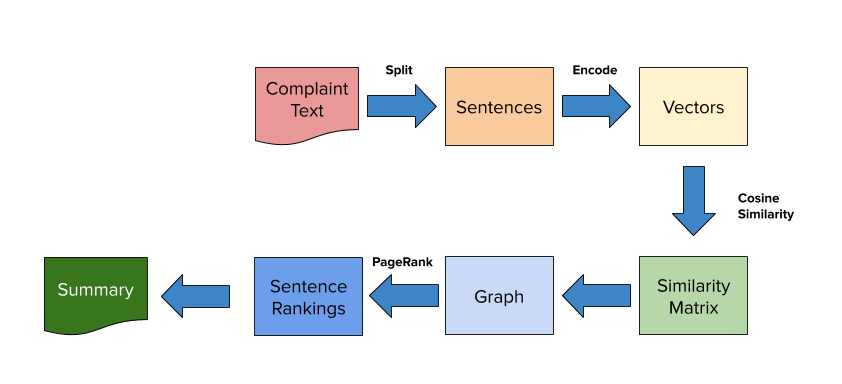







###**Purpose in Data Generation:**

**Abstractive Summarization:**

Pegasus excels at abstractive summarization, creating concise and coherent summaries that go beyond simple extractions. This is crucial for distilling essential information and generating meaningful content.

**Information Distillation:**

Pegasus serves as a tool for distilling large volumes of information into succinct summaries. This is valuable in scenarios where the sheer amount of data makes it challenging to extract key insights quickly.

**Data Augmentation:**

The summaries generated by Pegasus can be used to augment datasets for machine learning models. By providing additional examples of abstractive summarization, it enhances the diversity and richness of the training data.

**Enhancing Decision-Making:**

Pegasus-generated summaries can be utilized in decision support systems. By presenting the most relevant information in a condensed form, it aids decision-makers in understanding and processing critical details efficiently.
Content Curation and Filtering:

Pegasus can automatically curate and filter textual content by generating concise summaries. This is beneficial for organizing and prioritizing information, particularly in applications where content curation is essential.

**Knowledge Extraction:**

The abstractive nature of Pegasus's summarization allows for effective knowledge extraction. It identifies and preserves key insights from documents, contributing to knowledge discovery and dissemination.

**Customizable for Different Domains:**

Pegasus can be fine-tuned for specific domains, adapting its summarization capabilities to different types of textual content. This makes it versatile for use in various industries and applications.

**Natural Language Understanding:**

Pegasus's transformer-based architecture, combined with its pre-training technique, enhances its understanding of natural language. This results in more contextually aware and linguistically sound summaries.



###**Example1:**

In the below example, I have taken three articles to clean and summarize the document using NLP processes — Automatic Text Summarization.

####**Importing the required Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import pandas as pd
import warnings
import re
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
import string
from string import punctuation
from nltk.corpus import stopwords
from statistics import mean
from heapq import nlargest
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))
punctuation = punctuation + '\n' + '—' + '“' + ',' + '”' + '‘' + '-' + '’'
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Importing the dataset
df_1 = pd.read_csv("/content/articles1.csv")
df_2 = pd.read_csv("/content/articles2.csv")
df_3 = pd.read_csv("/content/articles3.csv")

In [3]:
# Checking if the columns are same or not
df_1.columns == df_2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [4]:
# Checking if the columns are same or not
df_2.columns == df_3.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [5]:
# Making one Dataframe by appending all of them for the further process
d = [df_1, df_2, df_3]
df = pd.concat(d, keys = ['x', 'y', 'z'])
df.rename(columns = {'content' : 'article'}, inplace = True);

In [6]:
df.head()

Unnamed: 0     id                                              title  \
x 0           0  17283  House Republicans Fret About Winning Their Hea...   
  1           1  17284  Rift Between Officers and Residents as Killing...   
  2           2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   
  3           3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...   
  4           4  17287  Kim Jong-un Says North Korea Is Preparing to T...   

        publication                         author        date    year  month  \
x 0  New York Times                     Carl Hulse  2016-12-31  2016.0   12.0   
  1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0   
  2  New York Times                   Margalit Fox  2017-01-06  2017.0    1.0   
  3  New York Times               William McDonald  2017-04-10  2017.0    4.0   
  4  New York Times                  Choe Sang-Hun  2017-01-02  2017.0    1.0   

     url                                            article  
x 0  NaN  WASHINGTON  —   Congressional Republicans have...  
  1  NaN  After the bullet shells get counted, the blood...  
  2  NaN  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  NaN  Death may be the great equalizer, but it isn’t...  
  4  NaN  SEOUL, South Korea  —   North Korea’s leader, ...

In [7]:
# Shape of the dataset
print ("The shape of the dataset : ", df.shape)

The shape of the dataset :  (142570, 10)


In [8]:
# Dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

id                                              title     publication  \
x 0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
  1  17284  Rift Between Officers and Residents as Killing...  New York Times   
  2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
  3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
  4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                            author        date    year  month  url  \
x 0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
  1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
  2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
  3               William McDonald  2017-04-10  2017.0    4.0  NaN   
  4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                               article  
x 0  WASHINGTON  —   Congressional Republicans have...  
  1  After the bullet shells get counted, the blood...  
  2  When Walt Disney’s “Bambi” opened in 1942, cri...  
  3  Death may be the great equalizer, but it isn’t...  
  4  SEOUL, South Korea  —   North Korea’s leader, ...

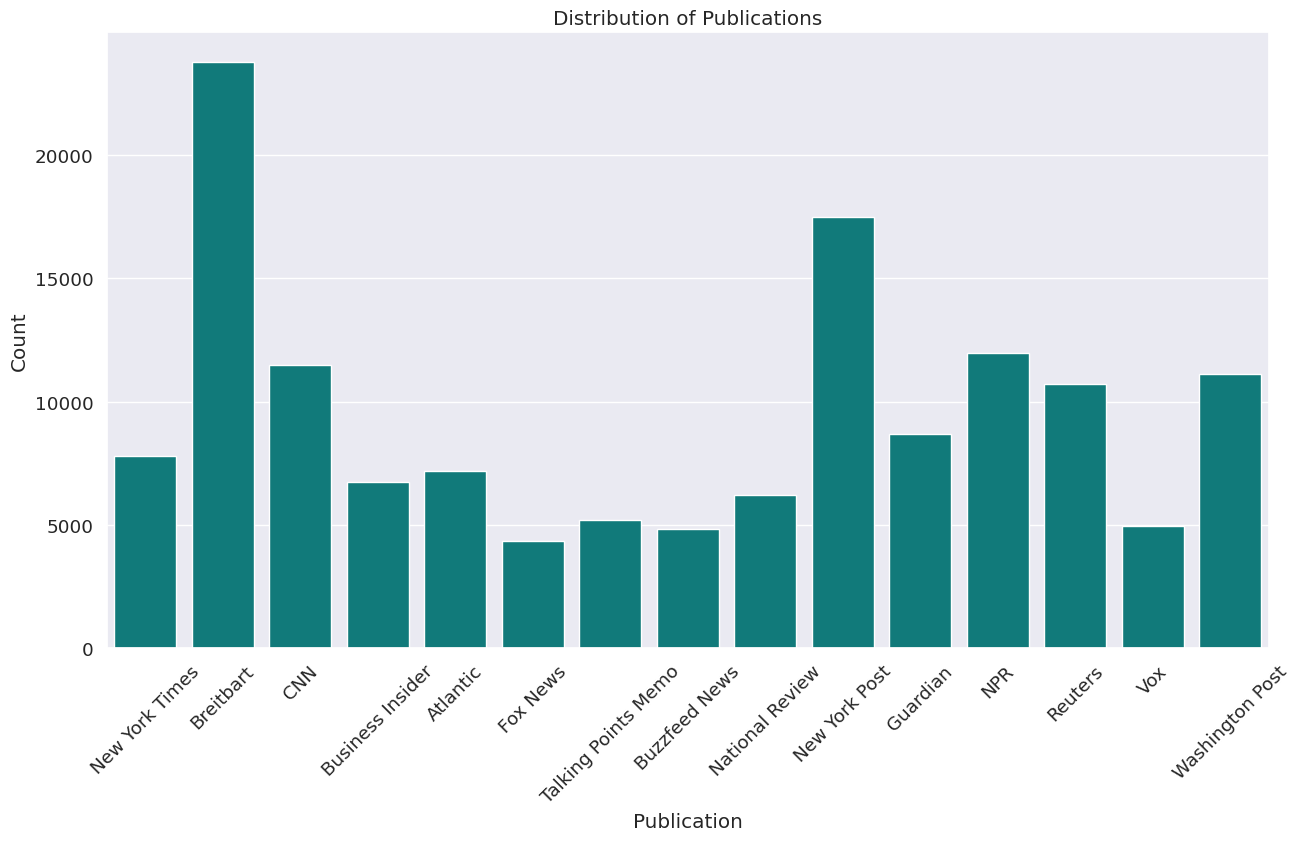

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'publication' is a column in it.
# Adjusting figure size and aesthetic parameters
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale=1.2, style='darkgrid')

# Using countplot with a slight modification for safety
# Ensure 'publication' is treated explicitly as a column name.
sns_year = sns.countplot(x='publication', data=df, color='darkcyan')

# Adjusting x-ticks, labels, and title
plt.xticks(rotation=45)
sns_year.set(xlabel="Publication", ylabel="Count", title="Distribution of Publications")

# Display the plot
plt.show()


###EDA

In [12]:
# Replacing the unnecessary row value of year with it's actual values
df['year'] = df['year'].replace("https://www.washingtonpost.com/outlook/tale-of-a-woman-who-died-and-a-woman-who-killed-in-the-northern-ireland-conflict/2019/03/08/59e75dd4-2ecd-11e9-8ad3-9a5b113ecd3c_story.html", 2019)

In [13]:
# Years
df['year'].value_counts()

year
2016.0    85405
2017.0    50404
2015.0     3705
2013.0      228
2014.0      125
2012.0       34
2011.0        8
2010.0        6
2008.0        3
2009.0        3
2004.0        2
2003.0        2
2005.0        2
2007.0        1
2000.0        1
Name: count, dtype: int64

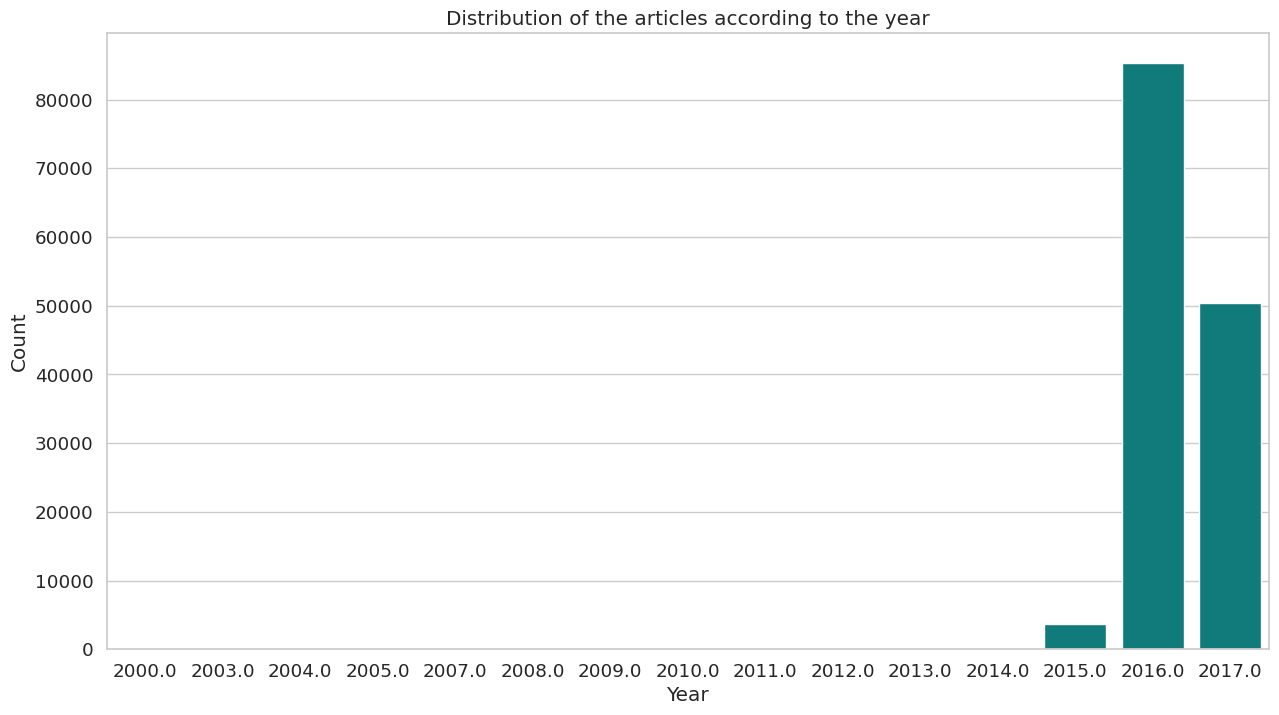

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and it has been properly defined before this code
plt.rcParams['figure.figsize'] = [15, 8]
sns.set(font_scale=1.2, style='whitegrid')

# If 'year' is a column in the DataFrame, this should work directly.
# If this raises an error, ensure 'year' is indeed a column and not part of a MultiIndex.
if 'year' in df.columns:
    sns_year = sns.countplot(x='year', data=df, color='darkcyan')
    sns_year.set(xlabel="Year", ylabel="Count", title="Distribution of the articles according to the year")
    plt.show()
else:
    print("'year' column not found in the DataFrame. Please check the DataFrame structure.")


In [16]:
# Authors
df['author'].value_counts()

author
Breitbart News                                         1559
Pam Key                                                1282
Associated Press                                       1231
Charlie Spiering                                        928
Jerome Hudson                                           806
                                                       ... 
Laura Italiano, Sophia Rosenbaum and Philip Messing       1
Larry Celona, C.J. Sullivan and Daniel Prendergast        1
Krit McClean                                              1
Melissa Klein and Joe Tacopino                            1
John Yearwood                                             1
Name: count, Length: 15647, dtype: int64

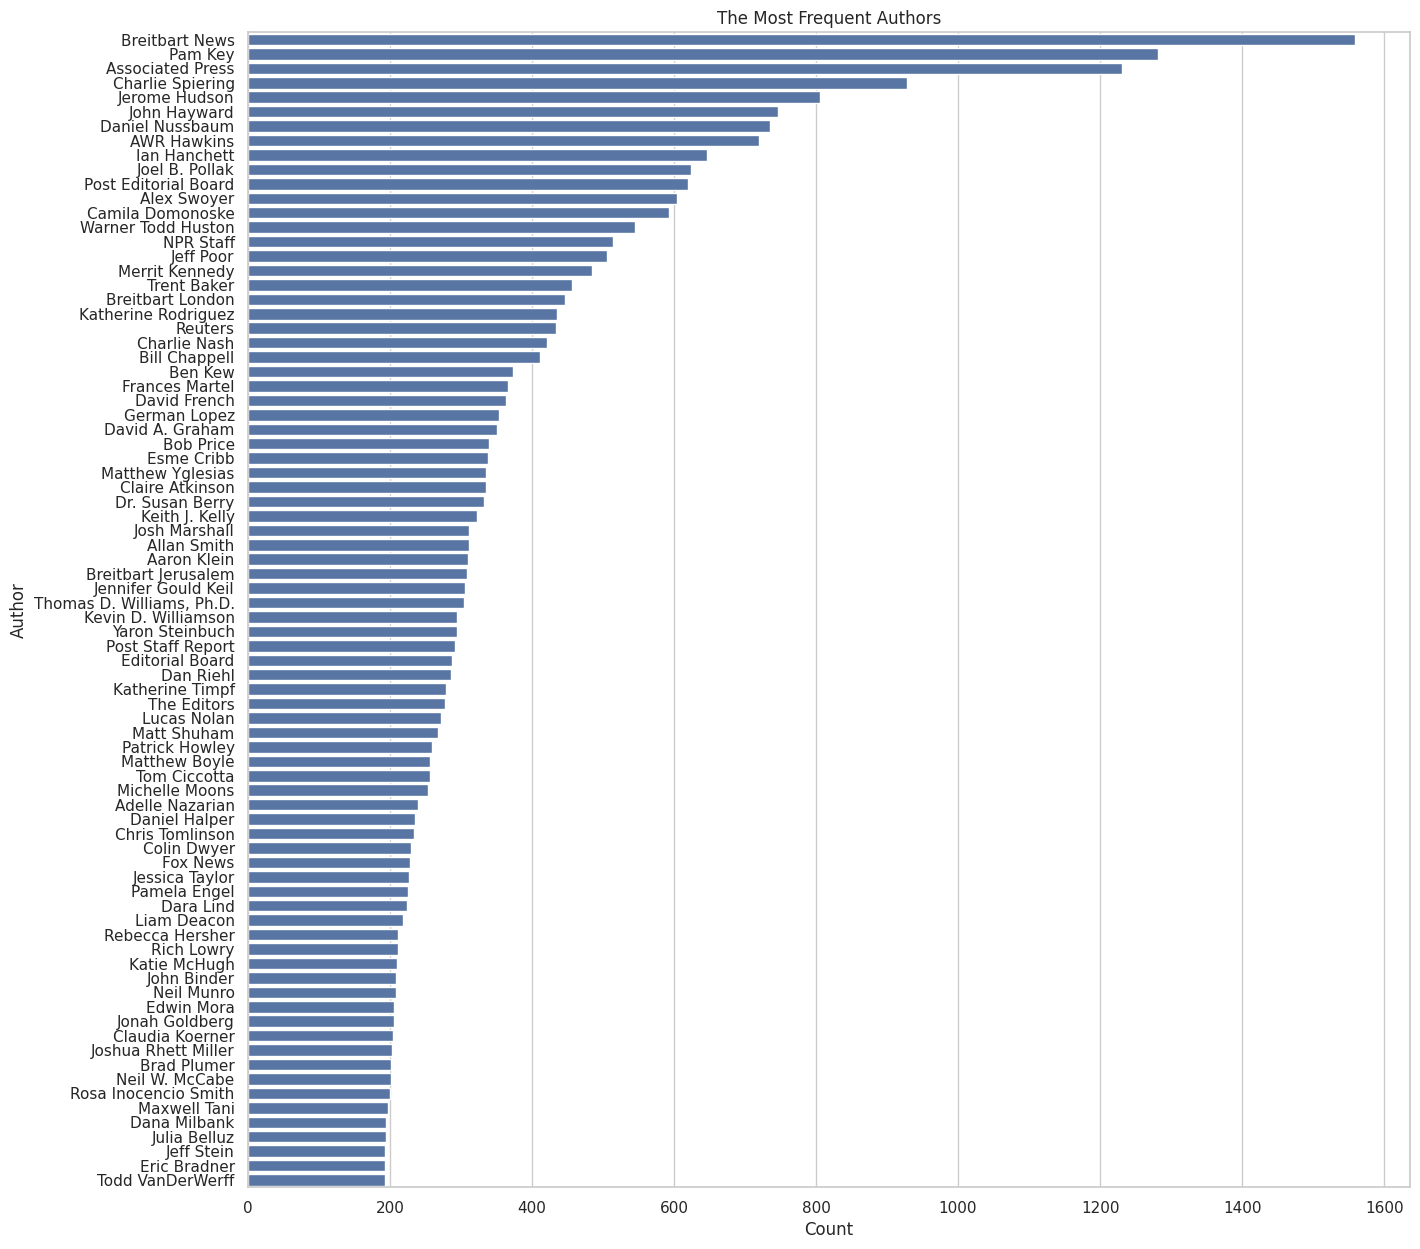

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'author' is a column in it
plt.rcParams['figure.figsize'] = [15, 15]
sns.set(font_scale=1, style='whitegrid')

# Get the top 80 authors by article count
df_author = df['author'].value_counts().head(80)

# Create a horizontal bar plot
# Since seaborn 0.11.0, you can pass a Series directly to the data parameter, and use the Series' name
barplot = sns.barplot(x=df_author, y=df_author.index)
barplot.set(xlabel="Count", ylabel="Author", title="The Most Frequent Authors")
plt.show()


In [19]:
# Changing the value "The Associated Press" to "Associated Press"
df['author'] = df['author'].replace("The Associated Press", "Associated Press")

###Computing Summarizer

In [20]:
contractions_dict = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"doesn’t": "does not",
"don't": "do not",
"don’t": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y’all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"’cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn’t’ve": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he had",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "i would",
"i’d’ve": "i would have",
"i’ll": "i will",
"i’ll’ve": "i will have",
"i’m": "i am",
"i’ve": "i have",
"isn’t": "is not",
"it’d": "it would",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she would",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t’ve": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that would",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’re": "you are",
"you’ve": "you have",
}
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Function to clean the html from the article
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext

# Function expand the contractions if there's any
def expand_contractions(s, contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, s)

# Function to preprocess the articles
def preprocessing(article):
    global article_sent

    # Converting to lowercase
    article = article.str.lower()

    # Removing the HTML
    article = article.apply(lambda x: cleanhtml(x))

    # Removing the email ids
    article = article.apply(lambda x: re.sub('\S+@\S+','', x))

    # Removing The URLS
    article = article.apply(lambda x: re.sub("((http\://|https\://|ftp\://)|(www.))+(([a-zA-Z0-9\.-]+\.[a-zA-Z]{2,4})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(/[a-zA-Z0-9%:/-_\?\.'~]*)?",'', x))

    # Removing the '\xa0'
    article = article.apply(lambda x: x.replace("\xa0", " "))

    # Removing the contractions
    article = article.apply(lambda x: expand_contractions(x))

    # Stripping the possessives
    article = article.apply(lambda x: x.replace("'s", ''))
    article = article.apply(lambda x: x.replace('’s', ''))
    article = article.apply(lambda x: x.replace("\'s", ''))
    article = article.apply(lambda x: x.replace("\’s", ''))

    # Removing the Trailing and leading whitespace and double spaces
    article = article.apply(lambda x: re.sub(' +', ' ',x))

    # Copying the article for the sentence tokenization
    article_sent = article.copy()

    # Removing punctuations from the article
    article = article.apply(lambda x: ''.join(word for word in x if word not in punctuation))

    # Removing the Trailing and leading whitespace and double spaces again as removing punctuation might
    # Lead to a white space
    article = article.apply(lambda x: re.sub(' +', ' ',x))

    # Removing the Stopwords
    article = article.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

    return article

# Function to normalize the word frequency which is used in the function word_frequency
def normalize(li_word):
    global normalized_freq
    normalized_freq = []
    for dictionary in li_word:
        max_frequency = max(dictionary.values())
        for word in dictionary.keys():
            dictionary[word] = dictionary[word]/max_frequency
        normalized_freq.append(dictionary)
    return normalized_freq

# Function to calculate the word frequency
def word_frequency(article_word):
    word_frequency = {}
    li_word = []
    for sentence in article_word:
        for word in word_tokenize(sentence):
            if word not in word_frequency.keys():
                word_frequency[word] = 1
            else:
                word_frequency[word] += 1
        li_word.append(word_frequency)
        word_frequency = {}
    normalize(li_word)
    return normalized_freq

# Function to Score the sentence which is called in the function sent_token
def sentence_score(li):
    global sentence_score_list
    sentence_score = {}
    sentence_score_list = []
    for list_, dictionary in zip(li, normalized_freq):
        for sent in list_:
            for word in word_tokenize(sent):
                if word in dictionary.keys():
                    if sent not in sentence_score.keys():
                        sentence_score[sent] = dictionary[word]
                    else:
                        sentence_score[sent] += dictionary[word]
        sentence_score_list.append(sentence_score)
        sentence_score = {}
    return sentence_score_list

# Function to tokenize the sentence
def sent_token(article_sent):
    sentence_list = []
    sent_token = []
    for sent in article_sent:
        token = sent_tokenize(sent)
        for sentence in token:
            token_2 = ''.join(word for word in sentence if word not in punctuation)
            token_2 = re.sub(' +', ' ',token_2)
            sent_token.append(token_2)
        sentence_list.append(sent_token)
        sent_token = []
    sentence_score(sentence_list)
    return sentence_score_list

# Function which generates the summary of the articles (This uses the 20% of the sentences with the highest score)
def summary(sentence_score_OwO):
    summary_list = []
    for summ in sentence_score_OwO:
        select_length = int(len(summ)*0.25)
        summary_ = nlargest(select_length, summ, key = summ.get)
        summary_list.append(".".join(summary_))
    return summary_list


# Functions to change the article string (if passed) to change it to generate a pandas series
def make_series(art):
    global dataframe
    data_dict = {'article' : [art]}
    dataframe = pd.DataFrame(data_dict)['article']
    return dataframe

# Function which is to be called to generate the summary which in further calls other functions alltogether
def article_summarize(artefact):

    if type(artefact) != pd.Series:
        artefact = make_series(artefact)

    df = preprocessing(artefact)

    word_normalization = word_frequency(df)

    sentence_score_OwO = sent_token(article_sent)

    summarized_article = summary(sentence_score_OwO)

    return summarized_article

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

# Function definitions for preprocessing, make_series, and article_summarize should be included here

def word_cloud(art):
    art_ = make_series(art)
    OwO = preprocessing(art_)
    wordcloud_ = WordCloud(height = 500, width = 1000, background_color = 'white').generate(OwO) # Should use OwO if it's the processed text
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Ensure that the NLTK punkt tokenizer is downloaded
nltk.download('punkt')

# Assuming your article_summarize and other necessary functions are defined correctly
# And df['article'] is accessible and contains the articles
summaries = article_summarize(df['article'][0:100])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
print ("The Actual length of the article is : ", len(df['article'][0]))
df['article'][0]

The Actual length of the article is :  5607


'WASHINGTON  —   Congressional Republicans have a new fear when it comes to their    health care lawsuit against the Obama administration: They might win. The incoming Trump administration could choose to no longer defend the executive branch against the suit, which challenges the administration’s authority to spend billions of dollars on health insurance subsidies for   and   Americans, handing House Republicans a big victory on    issues. But a sudden loss of the disputed subsidies could conceivably cause the health care program to implode, leaving millions of people without access to health insurance before Republicans have prepared a replacement. That could lead to chaos in the insurance market and spur a political backlash just as Republicans gain full control of the government. To stave off that outcome, Republicans could find themselves in the awkward position of appropriating huge sums to temporarily prop up the Obama health care law, angering conservative voters who have been 

In [24]:
print ("The length of the summarized article is : ", len(summaries[0]))
summaries[0]

The length of the summarized article is :  1682


'anticipating that the trump administration might not be inclined to mount a vigorous fight against the house republicans given the dim view of the health care law a team of lawyers this month sought to intervene in the case on behalf of two participants in the health care program.the incoming trump administration could choose to no longer defend the executive branch against the suit which challenges the administration authority to spend billions of dollars on health insurance subsidies for and americans handing house republicans a big victory on issues. in a potentially decision in 2015 judge rosemary m collyer ruled that house republicans had the standing to sue the executive branch over a spending dispute and that the obama administration had been distributing the health insurance subsidies in violation of the constitution without approval from congress.in their request the lawyers predicted that a deal between house republicans and the new administration to dismiss or settle the ca

###Example 2: Fine-tune Gemma Models using LoRA

* Gemma is a family of lightweight, state-of-the art open models built from the same research and technology used to create the Gemini models.

* Large Language Models (LLMs) like Gemma have been shown to be effective at a variety of NLP tasks. An LLM is first pre-trained on a large corpus of text in a self-supervised fashion. Pre-training helps LLMs learn general-purpose knowledge, such as statistical relationships between words. An LLM can then be fine-tuned with domain-specific data to perform downstream tasks (such as sentiment analysis).

LLMs are extremely large in size (parameters in the order of millions). Full fine-tuning (which updates all the parameters in the model) is not required for most applications because typical fine-tuning datasets are relatively much smaller than the pre-training datasets.

### **Low Rank Adaptation (LoRA)**

It is a fine-tuning technique which greatly reduces the number of trainable parameters for downstream tasks by freezing the weights of the model and inserting a smaller number of new weights into the model. This makes training with LoRA much faster and more memory-efficient, and produces smaller model weights (a few hundred MBs), all while maintaining the quality of the model outputs.

In the below example we will go through using KerasNLP to perform LoRA fine-tuning on a Gemma 2B model using the Databricks Dolly 15k dataset. This dataset contains 15,000 high-quality human-generated prompt / response pairs specifically designed for fine-tuning LLMs.


In [1]:
# Install Keras 3 last. See https://keras.io/getting_started/ for more details.
!pip install -q -U keras-nlp
!pip install -q -U keras>=3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.2/508.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 107.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatib

* Keras is a high-level, multi-framework deep learning API designed for simplicity and ease of use. Using Keras 3, you can run workflows on one of three backends: TensorFlow, JAX, or PyTorch.

For this, configure the backend for JAX.

In [2]:
import os

os.environ["KERAS_BACKEND"] = "jax"  # Or "torch" or "tensorflow".
# Avoid memory fragmentation on JAX backend.
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"]="1.00"

In [3]:
import keras
import keras_nlp

#### Preprocess the data. This dataset uses a subset of 1000 training examples to execute the notebook faster. Consider using more training data for higher quality fine-tuning.

In [5]:
#Load dataset
import json
data = []
with open('/content/databricks-dolly-15k.jsonl') as file:
    for line in file:
        features = json.loads(line)
        # Filter out examples with context, to keep it simple.
        if features["context"]:
            continue
        # Format the entire example as a single string.
        template = "Instruction:\n{instruction}\n\nResponse:\n{response}"
        data.append(template.format(**features))

# Only use 1000 training examples, to keep it fast.
data = data[:1000]

**Load Model**

KerasNLP provides implementations of many popular model architectures. In this example, we'll create a model using GemmaCausalLM, an end-to-end Gemma model for causal language modeling. A causal language model predicts the next token based on previous tokens.



In [9]:
!pip install transformers

#Create the model using the from_preset method:

from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = "gpt2"  # GPT-2 is a widely used causal language model
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)



**Inference before fine tuning**

In this section, you will query the model with various prompts to see how it responds.

In [10]:
# Prepare the prompt
prompt = "What should I do on a trip to Europe?"

# Encode the prompt and generate response
inputs = tokenizer.encode(prompt, return_tensors="pt")
output_sequences = model.generate(input_ids=inputs, max_length=256, num_return_sequences=1)

# Decode the output sequences to get the generated text
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)

print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What should I do on a trip to Europe?

The European Union is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state of the European Union. It is a member state 

In [12]:
# Encode the prompt to be compatible with the model input
prompt = "Explain the process of photosynthesis in a way that a child could understand."
input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Generate a sequence of text after the prompt
output_sequences = model.generate(
    input_ids=input_ids,
    max_length=256,
    num_return_sequences=1,
    temperature=0.7,  # Lower means less random, higher means more creative
    top_k=50,  # The number of highest probability vocabulary tokens to keep for top-k-filtering.
    top_p=0.95,  # If set to float < 1, only the most probable tokens with probabilities that add up to top_p or higher are kept for generation.
    repetition_penalty=1.2,
)

# Decode the generated sequence to readable text
generated_sequence = tokenizer.decode(output_sequences[0], skip_special_tokens=True)

print(generated_sequence)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:410: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:415: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explain the process of photosynthesis in a way that a child could understand.
The first step is to identify what's going on inside your body, and then you can use this information as an opportunity to learn about how plants work together for energy production (and other purposes). The second part is to find out if there are any specific chemicals or nutrients involved with these processes—for example, when they're being used by bacteria like chlorophylls; why do some things happen naturally while others aren't? And finally it all comes down into one simple question: What does "green" mean?"


###LoRA Fine-tuning

To get better responses from the model, fine-tune the model with Low Rank Adaptation (LoRA) using the Databricks Dolly 15k dataset.

The LoRA rank determines the dimensionality of the trainable matrices that are added to the original weights of the LLM. It controls the expressiveness and precision of the fine-tuning adjustments.

A higher rank means more detailed changes are possible, but also means more trainable parameters. A lower rank means less computational overhead, but potentially less precise adaptation.

This tutorial uses a LoRA rank of 4. In practice, begin with a relatively small rank (such as 4, 8, 16). This is computationally efficient for experimentation. Train your model with this rank and evaluate the performance improvement on your task. Gradually increase the rank in subsequent trials and see if that further boosts performance.

In [14]:
import tensorflow as tf

class LoRALayer(tf.keras.layers.Layer):
    def __init__(self, original_weight_shape, rank=4, **kwargs):
        super(LoRALayer, self).__init__(**kwargs)
        self.original_weight_shape = original_weight_shape
        self.rank = rank

    def build(self, input_shape):
        self.Wa = self.add_weight(shape=(self.original_weight_shape[0], self.rank),
                                  initializer='random_normal',
                                  trainable=True)
        self.Wb = self.add_weight(shape=(self.rank, self.original_weight_shape[1]),
                                  initializer='random_normal',
                                  trainable=True)

    def call(self, inputs):
        delta_weight = tf.matmul(self.Wa, self.Wb)
        return inputs + delta_weight

# Example of wrapping a model layer with LoRA
# This is a conceptual example. You'll need to adapt it based on the specific layer and architecture of GPT-2.


In [42]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# For PyTorch, set the model in training mode (if it's not by default)
model.train()

# Define a PyTorch optimizer
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=5e-5)




In [39]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

class AdamW(Adam):
    def __init__(self, weight_decay=0.01, **kwargs):
        super().__init__(**kwargs)
        self.weight_decay = weight_decay

    @tf.function
    def _resource_apply_dense(self, grad, var, apply_state=None):
        var_dtype = var.dtype.base_dtype
        lr_t = self._decayed_lr(var_dtype)
        wd = lr_t * self.weight_decay
        var.assign_sub((lr_t * grad) + (var * wd))

optimizer = AdamW(learning_rate=5e-5)





In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters (adjust these to match your dataset)
max_features = 10000  # Vocabulary size
embedding_dims = 50  # Dimensionality of embedding vector
num_classes = 10  # Number of output classes

# Simulated dataset placeholders
texts = ["Sample text data", "Another sample", "One more sample"]
labels = np.array([1, 0, 2])  # Example integer labels for each text

# Tokenize text
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Pad sequences to have the same length
maxlen = max(len(seq) for seq in sequences)  # Dynamically determine maxlen
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Convert labels to categorical
labels = tf.keras.utils.to_categorical(labels, num_classes=num_classes)

# Define the model without specifying input_length in the Embedding layer
model = Sequential([
    Embedding(input_dim=max_features, output_dim=embedding_dims),  # Removed input_length
    GlobalAveragePooling1D(),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(padded_sequences, labels, epochs=1, batch_size=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.0000e+00 - loss: 2.2925


In [47]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Encode context the generation is conditioned on
input_ids = tokenizer.encode('What should I do on a trip to Europe?', return_tensors='pt')

# Generate a sequence of text
output_sequences = model.generate(
    input_ids=input_ids,
    max_length=256,
    temperature=1.0,
    top_k=50,
    top_p=0.95,
    repetition_penalty=1.2,
    do_sample=True,
    num_return_sequences=1,
)

# Decode and print the output text.
text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


What should I do on a trip to Europe? How can you make it easier for us and our partners, which are taking part in the trade mission?"
 (Photo courtesy of European Union)


In [49]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Load pre-trained model tokenizer (vocabulary)
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Load pre-trained model (weights)
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Prepare the prompt
prompt = "Explain the process of photosynthesis in a way that a child could understand."

# Encode the prompt
input_ids = tokenizer.encode(prompt, return_tensors='pt')

# Generate text
output_sequences = model.generate(
    input_ids=input_ids,
    max_length=256,
    temperature=1.0,  # Adjust the temperature parameter to control the creativity of the output
    top_k=50,
    top_p=0.95,
    repetition_penalty=1.2,
    do_sample=True,
    num_return_sequences=1,
)

# Decode the generated text
generated_text = tokenizer.decode(output_sequences[0], skip_special_tokens=True)

print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Explain the process of photosynthesis in a way that a child could understand.
It was quite helpful, as I started my training with an animal but didn't get through to people who were trained for this kind (especially during work time where lots are needed). So at least it got me thinking about what can be done and learned when there is need while working on complex crops which might not already exist by now... But just don' t forget we have other important issues around food security right below you - such problems regarding deforestation may seem daunting though some think they're pretty much trivial: We all know climate change will cause more greenhouse gas emissions per billion individuals than any previous generation did! It seems reasonable after looking into both real world scenarios like our own research shows how big human impacts would become if humanity never moved further off course compared today's future trajectories.... Yet again one must wonder why someone so focused upon

The model now explains photosynthesis in simpler terms.

Note that for demonstration purposes, this tutorial fine-tunes the model on a small subset of the dataset for just one epoch and with a low LoRA rank value. To get better responses from the fine-tuned model, you can experiment with:

Increasing the size of the fine-tuning dataset
Training for more steps (epochs)
Setting a higher LoRA rank
Modifying the hyperparameter values such as learning_rate and weight_decay.

###References

https://www.shopify.com/blog/pagerank

https://www.mdpi.com/2079-9292/12/2/372#:~:text=The%20TextRank%20algorithm%20is%20a,a%20similarity%20matrix%20%5B10%5D.

https://ankitnitjsr13.medium.com/text-rank-algorithm-a8c2cc58ea9c

https://ai.google.dev/gemma/docs/get_started

https://ai.google.dev/gemma/docs/distributed_tuning



MIT License

Copyright (c) 2024 Anusree Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE
